In [5]:
import numpy as np
import pandas as pd

# Load the data
df = pd.read_csv("dataFiles/50_Startups.csv")

# Extract features (X) and target variable (y)
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Encode categorical data (One-Hot Encoding for the State column)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
x[:, 3] = label_encoder.fit_transform(x[:, 3])
one_hot_encoder = OneHotEncoder(categories='auto')
x = one_hot_encoder.fit_transform(x).toarray()

# Avoid the dummy variable trap (remove one of the one-hot encoded columns)
x = x[:, 1:]

# Split the dataset into training and testing sets
def train_test_split_custom(x, y, test_size, random_state):
    np.random.seed(random_state)
    indices = np.arange(len(y))
    np.random.shuffle(indices)
    test_size = int(len(y) * test_size)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    x_train = x[train_indices]
    y_train = y[train_indices]
    x_test = x[test_indices]
    y_test = y[test_indices]
    return x_train, x_test, y_train, y_test

Xtrain, Xtest, Ytrain, Ytest = train_test_split_custom(x, y, test_size=0.3, random_state=42)

# Standardize features
def standardize_features(x):
    means = np.mean(x, axis=0)
    stds = np.std(x, axis=0)
    x_normalized = (x - means) / stds
    return x_normalized

Xtrain = standardize_features(Xtrain)
Xtest = standardize_features(Xtest)

# Define the linear regression functions
def cost_function(x, y, w, b):
    m = len(y)
    predictions = np.dot(x, w) + b
    cost = np.sum((predictions - y) ** 2) / (2 * m)
    return cost

def gradient_descent(x, y, w, b, learning_rate, epochs):
    m = len(y)
    cost_list = []

    for epoch in range(epochs):
        predictions = np.dot(x, w) + b
        loss = predictions - y

        w_gradient = np.dot(x.T, loss) / m
        b_gradient = np.sum(loss) / m

        w = w - learning_rate * w_gradient
        b = b - learning_rate * b_gradient

        cost = cost_function(x, y, w, b)
        cost_list.append(cost)

        if (epoch % (epochs / 10) == 0):
            print("Cost is:", cost)

    return w, b, cost_list

# Initialize weights and bias
num_features = Xtrain.shape[1]
w_initial = np.zeros(num_features)
b_initial = 0

# Perform gradient descent
learning_rate = 0.002
epochs = 15000
w_final, b_final, cost_history = gradient_descent(Xtrain, Ytrain, w_initial, b_initial, learning_rate, epochs)

# Make predictions on the test set
def predict_custom(X, w, b):
    return np.dot(X, w) + b

Ypred = predict_custom(Xtest, w_final, b_final)

# Calculate R-squared score
def r2score_custom(y_pred, y_true):
    rss = np.sum((y_pred - y_true) ** 2)
    tss = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (rss / tss)
    return r2

r2_score = r2score_custom(Ypred, Ytest)
print("R-squared score:", r2_score)


C:\Users\DELL2\AppData\Local\Temp\ipykernel_31224\613856546.py:41: RuntimeWarning: invalid value encountered in divide
  x_normalized = (x - means) / stds


Cost is: nan
Cost is: nan
Cost is: nan
Cost is: nan
Cost is: nan
Cost is: nan
Cost is: nan
Cost is: nan
Cost is: nan
Cost is: nan
R-squared score: nan


       TV  Sales
0   230.1   22.1
1    44.5   10.4
2    17.2   12.0
3   151.5   16.5
4   180.8   17.9
..    ...    ...
68  237.4   18.9
69  216.8   22.3
70  199.1   18.3
71  109.8   12.4
72   26.8    8.8

[73 rows x 2 columns]


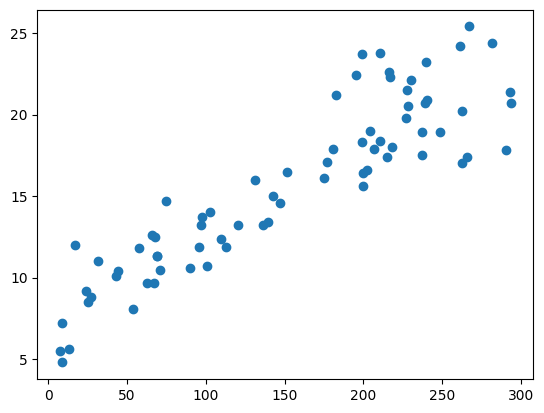

Slope (m): 0.09072759229988865
Intercept (c): 0.036348098387882916


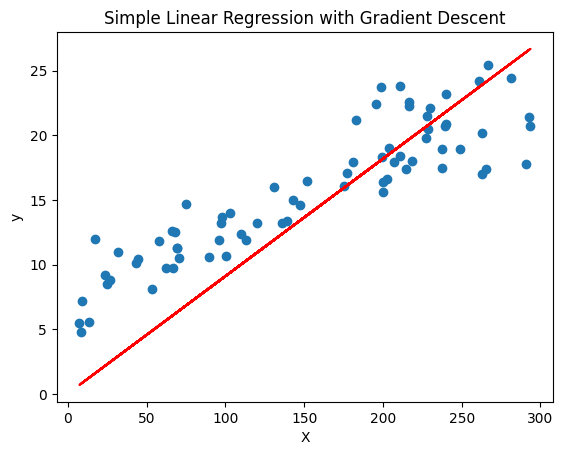

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("dataFiles/advertising.csv")
print(data)

X = data.iloc[:, 0]
y = data.iloc[:, 1]
plt.scatter(x, y)
plt.show()

# Implement gradient descent for SLR

# Define initial parameters
m = 0  # Initial slope
c = 0  # Initial intercept
learning_rate = 0.00001
epochs = 1000

# Perform gradient descent
for i in range(epochs):
    y_pred = m * X + c  # Predicted values

    # Calculate gradients
    grad_m = (-2 / len(X)) * np.sum(X * (y - y_pred))
    grad_c = (-2 / len(X)) * np.sum(y - y_pred)

    # Update parameters
    m -= learning_rate * grad_m
    c -= learning_rate * grad_c

# Print the final parameters
print("Slope (m):", m)
print("Intercept (c):", c)

# Plot the regression line
plt.scatter(X, y)
plt.plot(X, m * X + c, color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Simple Linear Regression with Gradient Descent")
plt.show()
